# <span style="color:darkblue"> **Logistic Regression – Learning Project** </span> 


Classification of Machine Learning algorithm used:
* Supervised Learning
    * Binary Classification Algorithms
        * **Logistic Regression** 

Project is based on the Logistic Regression Project from ‘Python for Data Science and Machine Learning Bootcamp’ by Jose Portilla. 
<br> Course is available on Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) </br>

#### Differences with respect to the original project.
* Use of pipeline and feature scaling from sklearn
* Additional feature for the Logistic Regression model based on the:
    * country,
    * city (ToDo),
    * timestamp data (ToDo)
* ToDo: Find another dataset big enough that it will also enable train/test/validation split

#### From original file:

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

**Libraries imports**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import cufflinks as cf
#cf.go_offline()

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
ad_data = pd.read_csv('advertising.csv')

**Preliminary look at the data**

In [5]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## <span style="color:darkblue"> Exploratory Data Analysis </span>

In [8]:
bins_set = [ad_data['Age'].min(),25,30,35,40,45,50,55,ad_data['Age'].max()]
count, bin_edges = np.histogram(ad_data['Age'], bins = bins_set)

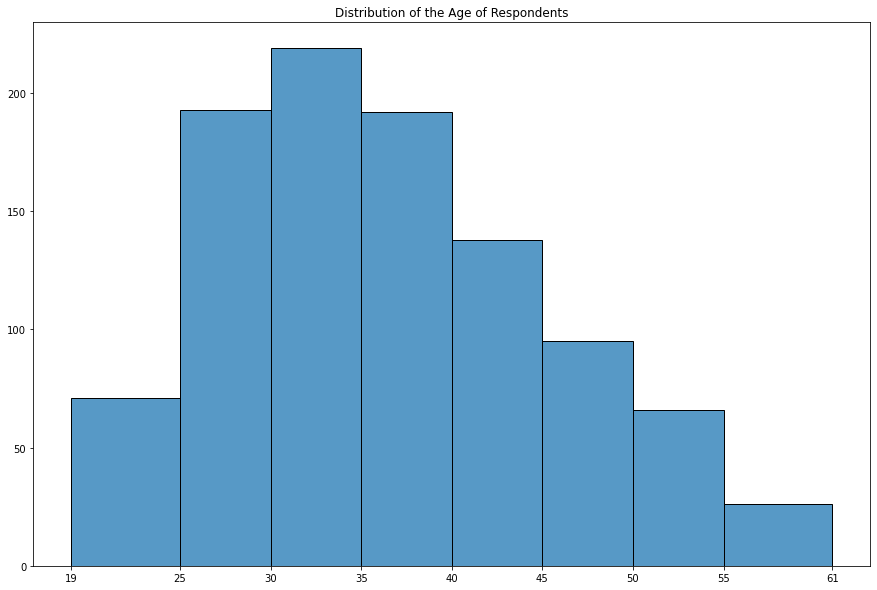

In [9]:
figAge = plt.figure(figsize=(15, 10),facecolor=(1, 1, 1))
axAge = sns.histplot(data = ad_data, x = ad_data['Age'], bins = bin_edges)
axAge.set_xticks(bins_set)
axAge.set_xlabel('')
axAge.set_ylabel('')
axAge.set_title('Distribution of the Age of Respondents')
#figAge.savefig('developers_age')
plt.show()

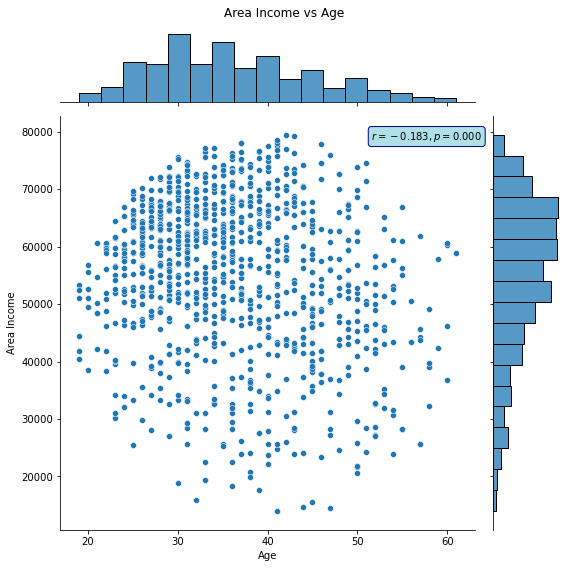

In [10]:
graph = sns.jointplot(y = 'Area Income', x = 'Age', data = ad_data, height = 8)
r, p = stats.pearsonr(ad_data['Area Income'], ad_data['Age'])

graph.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
                    xy=(0.75, 0.95), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
graph.ax_joint.set_xlabel('Age')
graph.ax_joint.set_ylabel('Area Income')

graph.fig.suptitle("Area Income vs Age")
graph.fig.tight_layout()

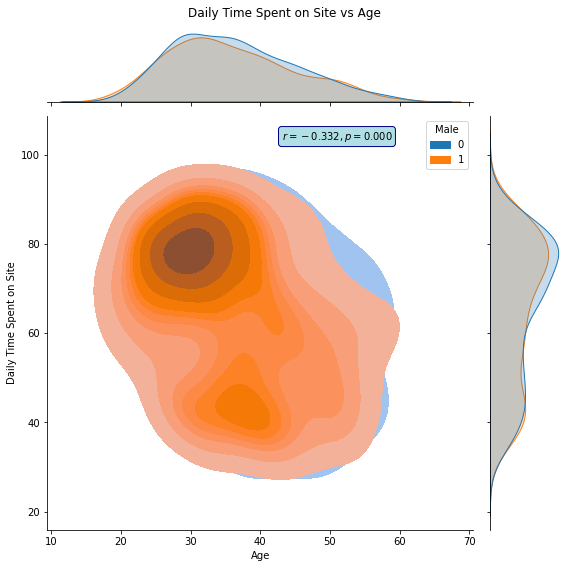

In [11]:
graph = sns.jointplot(y = 'Daily Time Spent on Site', x = 'Age', data = ad_data, hue = 'Male', kind = 'kde', height = 8, color = 'red', fill = 'True')
r, p = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Age'])

graph.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
                    xy=(0.55, 0.95), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
graph.ax_joint.set_xlabel('Age')
graph.ax_joint.set_ylabel('Daily Time Spent on Site')

graph.fig.suptitle("Daily Time Spent on Site vs Age")
graph.fig.tight_layout()

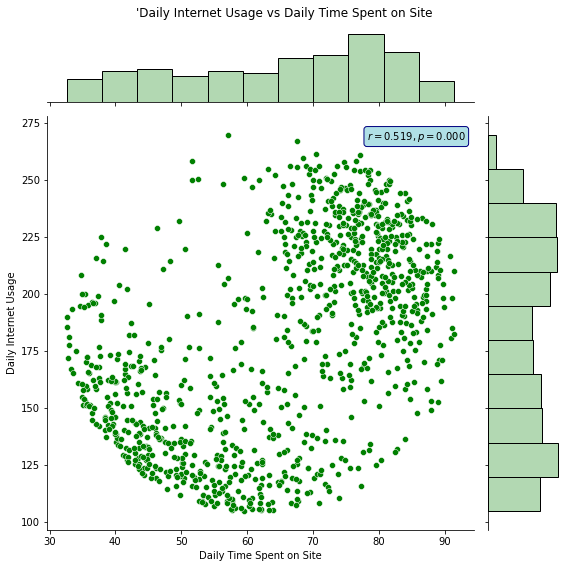

In [12]:
graph = sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, height = 8, color = 'green', marginal_kws={'alpha': 0.3})
r, p = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])

graph.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
                    xy=(0.75, 0.95), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
graph.ax_joint.set_ylabel('Daily Internet Usage')
graph.ax_joint.set_xlabel('Daily Time Spent on Site')

graph.fig.suptitle("'Daily Internet Usage vs Daily Time Spent on Site")
graph.fig.tight_layout()

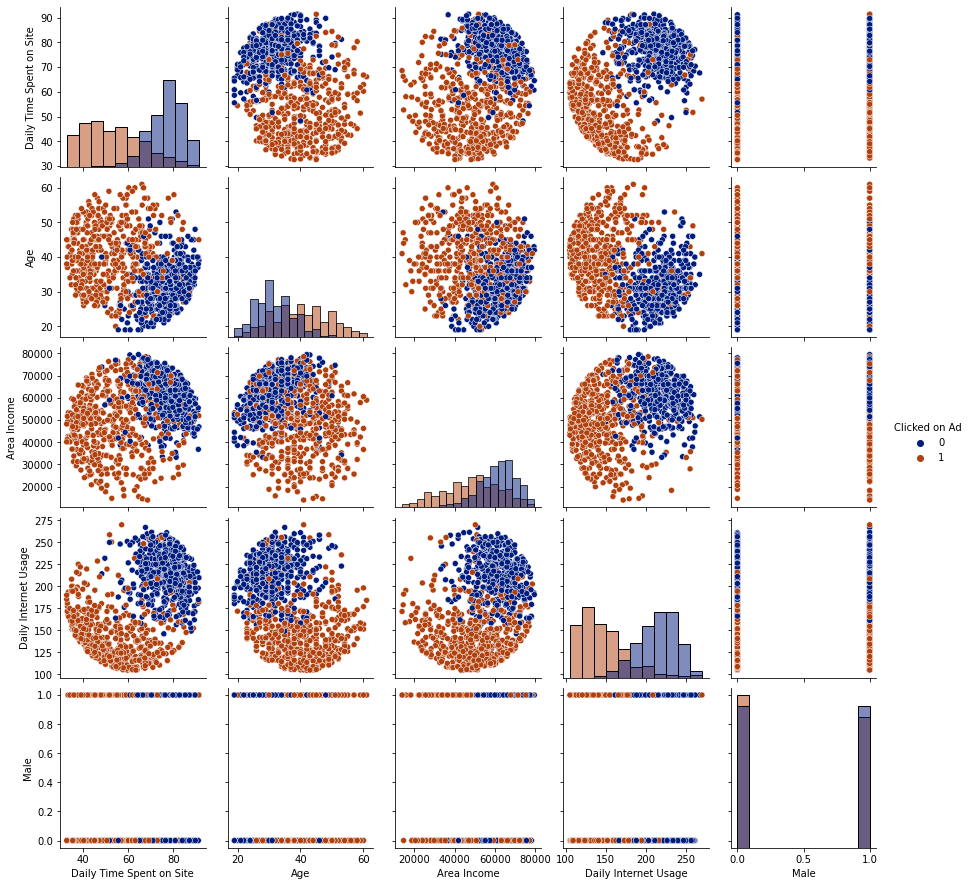

In [13]:
sns.pairplot(data = ad_data, diag_kind='hist', hue = 'Clicked on Ad', palette='dark' )

# <span style="color:darkblue"> Logistic Regression </span>

## <span style="color:darkgreen"> Original feature set </span>

In [14]:
ad_data_original = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1)
X_original = ad_data_original.drop('Clicked on Ad',axis=1)
y_original = ad_data_original['Clicked on Ad']

In [15]:
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, 
                                                                                        y_original, 
                                                                                        test_size=0.30, 
                                                                                        random_state=101)

In [16]:
logmodel_original = LogisticRegression()
logmodel_original.fit(X_original_train,y_original_train)

LogisticRegression()

### Predictions and Evaluations

In [17]:
predictions_original = logmodel_original.predict(X_original_test)

In [18]:
print(classification_report(y_original_test,predictions_original))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



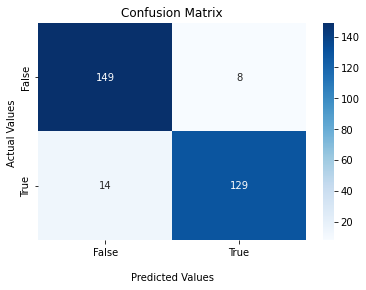

In [19]:
#print(confusion_matrix(y_original_test,predictions_original))
cf_matrix = confusion_matrix(y_original_test,predictions_original)

ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
# ## confusion matrix expressed as percentage
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

## <span style="color:darkgreen"> Expanded features set and features scaling </span>

In [21]:
# pipeline is for making more than one operation at one go
# remaining imports are for features scaling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Only features rescaling

In [22]:
ad_data_rescaled = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1)
X_rescaled = ad_data_rescaled.drop('Clicked on Ad',axis=1)
y_rescaled = ad_data_rescaled['Clicked on Ad']

In [23]:
ad_data_rescaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [24]:
X_rescaled_train, X_rescaled_test, y_rescaled_train, y_rescaled_test = train_test_split(X_rescaled, 
                                                                                        y_rescaled, 
                                                                                        test_size=0.30, 
                                                                                        random_state=101)

In [25]:
pipe_rescaled = make_pipeline(MinMaxScaler(), LogisticRegression())

In [26]:
pipe_rescaled.fit(X_rescaled_train,y_rescaled_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [27]:
predictions_rescaled = pipe_rescaled.predict(X_rescaled_test)

In [28]:
print(classification_report(y_rescaled_test,predictions_rescaled))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



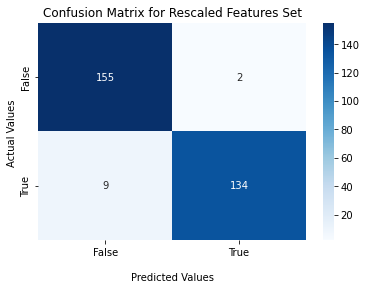

In [29]:
cf_matrix_rescaled = confusion_matrix(y_rescaled_test,predictions_rescaled)

ax = sns.heatmap(cf_matrix_rescaled, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix for Rescaled Features Set');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

As we see rescaling features lead to improvements in accuracy and precision of our model

### Additional features (Country -> Region) and features rescaling

In [30]:
import country_converter as coco
cc = coco.CountryConverter(include_obsolete=True)

In [31]:
# converts country names to region based on MESSAGE classification
# https://previous.iiasa.ac.at/web/home/research/researchPrograms/Energy/MESSAGE-model-regions.en.html
def country_to_region(x):
    return cc.convert(names=x, to='MESSAGE', not_found=None)

In [32]:
# to keep original dataframe unchenged
ad_data_new = ad_data

In [33]:
ad_data_new['Region'] = ad_data_new['Country'].apply(country_to_region)

In [34]:
ad_data_new['Region'].unique()

array(['MEA', nan, 'WEU', 'PAS', 'PAO', 'LAC', 'AFR', 'EEU', 'SAS', 'FSU',
       'NAM', 'CPA'], dtype=object)

In [35]:
#ad_data_new.head()

In [36]:
# Transform categorical column ‘Country’ to dummy numerical variables, drop_first is used to remove multicollinearity of dummy variables
region = pd.get_dummies(ad_data_new['Region'],drop_first=True)

In [37]:
ad_data_extended = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Region'], axis = 1)
ad_data_extended = pd.concat([ad_data_extended, region], axis = 1)
X_extended = ad_data_extended.drop('Clicked on Ad',axis=1)
y_extended = ad_data_extended['Clicked on Ad']

In [38]:
X_extended_train, X_extended_test, y_extended_train, y_extended_test = train_test_split(X_extended, 
                                                                                        y_extended, 
                                                                                        test_size=0.30, 
                                                                                        random_state=101)

In [39]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())

In [40]:
pipe.fit(X_extended_train,y_extended_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [41]:
# not working without features scaling
#logmodel_extended = LogisticRegression()
#logmodel_extended.fit(X_extended_train,y_extended_train)
#predictions_extended = logmodel_extended.predict(X_extended_test)

In [42]:
predictions_extended = pipe.predict(X_extended_test)

In [43]:
print(classification_report(y_extended_test,predictions_extended))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



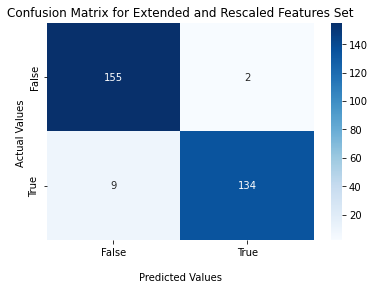

In [44]:
cf_matrix_extended = confusion_matrix(y_extended_test,predictions_extended)

ax = sns.heatmap(cf_matrix_extended, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix for Extended and Rescaled Features Set');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Adding features based on the country of the respondent does not bring the improvement to our model.
This is to be expected, since the most relevant data we could get from country/region was average wealth of respondents and this is already coded in Avg. Area Income.